<a href="https://colab.research.google.com/github/TokyoProgramming/Corona_NLP/blob/main/Corona_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.text.all import *

In [ ]:
from fastai.text.all import *
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/corona/Corona_NLP_train.csv', 
                       engine='python', encoding = "ISO-8859-1", error_bad_lines=False,
                        usecols = ['OriginalTweet', 'Sentiment'])

In [ ]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


data cleaning

1.   convert & to and
2.   lowercase to the text
3.   Remove Unicode characters
4.   Remove stop words
      *   stop words is a type of word that has no significant contribution to the meaning of the text
      *   Use NLTK library 
    
5.   Remove terms like mentions, hashtags, links, and more.




1. convert & to and

In [ ]:
s = 'Global oil prices rise after US President Donald Trump said he expects Saudi Arabia &amp; Russia to reach a deal soon to end price war. Trump to meet Exxon Mobil &amp; Chevron on Friday #COVID19Pandemic #coronavirus https://t.co/w3uWv4jnjW'

In [ ]:
s

'Global oil prices rise after US President Donald Trump said he expects Saudi Arabia &amp; Russia to reach a deal soon to end price war. Trump to meet Exxon Mobil &amp; Chevron on Friday #COVID19Pandemic #coronavirus https://t.co/w3uWv4jnjW'

In [ ]:
s = s.replace('&amp;', 'and')


2. lowercase to the text

In [ ]:
s = s.lower()
s

'global oil prices rise after us president donald trump said he expects saudi arabia and russia to reach a deal soon to end price war. trump to meet exxon mobil and chevron on friday #covid19pandemic #coronavirus https://t.co/w3uwv4jnjw'

3. Remove Unicode characters

In [ ]:
t ="Reddit Will Now QuarantineÛ_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech #Business http://t.co/PAWvNJ4sAP"
t

'Reddit Will Now Quarantine\x89Û_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech #Business http://t.co/PAWvNJ4sAP'

In [ ]:
t = t.encode('ascii', 'ignore').decode()
t

'Reddit Will Now Quarantine_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech #Business http://t.co/PAWvNJ4sAP'

4. remove stop words

In [ ]:
import nltk
nltk.download('all')

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english'))

t = ' '.join([word for word in t.split(' ') if word not in stop_words])
t

'Reddit Will Now Quarantine_  #onlinecommunities #reddit #amageddon #freespeech #Business '

Remove terms like mentions, hashtags, links, and more

In [ ]:
import re
# Remove mentions
x = "@DDNewsLive @NitishKumar  and @ArvindKejriwal can't survive without referring @@narendramodi . Without Mr Modi they are BIG ZEROS"
x = re.sub("@\S+", " ", x)
print(x)




     and   can't survive without referring   . Without Mr Modi they are BIG ZEROS


In [ ]:
# Remove URL
x = "Severe Thunderstorm pictures from across the Mid-South http://t.co/UZWLgJQzNS"
x = re.sub("https*\S+", " ", x)
print(x)



Severe Thunderstorm pictures from across the Mid-South  


In [ ]:
# Remove Hashtags
x = "Are people not concerned that after #SLAB's obliteration in Scotland #Labour UK is ripping itself apart over #Labourleadership contest?"
x = re.sub("#\S+", " ", x)
print(x)



Are people not concerned that after   obliteration in Scotland   UK is ripping itself apart over   contest?


In [ ]:
# Remove ticks and the next character
x = "Notley's tactful yet very direct response to Harper's attack on Alberta's gov't. Hell YEAH Premier! http://t.co/rzSUlzMOkX #ableg #cdnpoli"
x = re.sub("\'\w+", '', x)
print(x)



Notley tactful yet very direct response to Harper attack on Alberta gov. Hell YEAH Premier! http://t.co/rzSUlzMOkX #ableg #cdnpoli


In [ ]:
# Remove punctuations
x = "In 2014 I will only smoke crqck if I becyme a mayor. This includes Foursquare."
x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
print(x)



In 2014 I will only smoke crqck if I becyme a mayor  This includes Foursquare 


In [ ]:
# Remove numbers
x = "C-130 specially modified to land in a stadium and rescue hostages in Iran in 1980... http://t.co/tNI92fea3u http://t.co/czBaMzq3gL"
x = re.sub(r'\w*\d+\w*', '', x)
print(x)



C- specially modified to land in a stadium and rescue hostages in Iran in ... http://t.co/ http://t.co/


In [ ]:
# Replace the over spaces
x = "     and   can't survive without referring   . Without Mr Modi they are BIG ZEROS"
x = re.sub('\s{2,}', " ", x)
print(x)

 and can't survive without referring . Without Mr Modi they are BIG ZEROS


combine them

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords

nltk.download('all')

stop_words = set(stopwords.words('english'))

cleaned_text = []

def clean_text(text_column):


  for text in text_column:
    #text = text.lower()
    #text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    text = text.replace('&amp;', 'and')
    text = text.encode('ascii', 'ignore').decode()
    text = re.sub(r'https*\S+', ' ', text)
    #text = re.sub(r'@\S+', ' ', text)
    #text = re.sub(r'#\S+', ' ', text)
    #text = re.sub(r'\'\w+', '', text)
    #text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    #text = re.sub(r'\w*\d+\w*', '', text)
    #text = re.sub(r'\s{2,}', ' ', text)
    cleaned_text.append(text)
  
  df['cleaned_text'] = cleaned_text
  return df


In [ ]:
text = data.iloc[4]['OriginalTweet']
text

"#boycottmcdonalds \r\r\nThe people making your food could have #Coronavirus as McDonald's won't let its  employees wear masks!\r\r\nMcDonaldÂ\x92s Workers Demand Greater Safety and Economic Protection as COVID-19 Pandemic Intensifies - Fight for $15 https://t.co/5ZNUZXcMQO #FightFor15"

In [ ]:
res_df = clean_text(df['OriginalTweet'])

In [ ]:
train, test = train_test_split(range(len(res_df)), test_size = 0.3)
train_df = res_df.iloc[train]
test_df = res_df.iloc[test]
train_df.shape, test_df.shape

((28809, 3), (12348, 3))

In [ ]:
train_df.head()

,OriginalTweet,Sentiment,cleaned_text
20468,Look at the massive amount of CEOs which are all pedophiles have stepped down,Neutral,Look at the massive amount of CEOs which are all pedophiles have stepped down
36278,"In Praise of Preppers: Thanks to a community that has literally been waiting for this day to come, thereÂs now an online shopping industry to help you prepare for the COVID-19 apocalypse. https://t.co/c9FsNMaC7n",Extremely Positive,"In Praise of Preppers: Thanks to a community that has literally been waiting for this day to come, theres now an online shopping industry to help you prepare for the COVID-19 apocalypse."
15665,best recipe for handmade sanitizer ... it really works! #Coronavirus .... https://t.co/bTaoQMBAn1,Extremely Positive,best recipe for handmade sanitizer ... it really works! #Coronavirus ....
38348,Last week the amp took unprecedented action to try and stop related scam from bombarding American consumers demanding that gateway providers cut off robocallers in 48 hours or risk losing all access to U S phone network,Extremely Negative,Last week the amp took unprecedented action to try and stop related scam from bombarding American consumers demanding that gateway providers cut off robocallers in 48 hours or risk losing all access to U S phone network
32507,The rise in consumer prices eased to 2.5 percent year-on-year in March due mainly to the price freeze put in place by the government under the nationwide state of calamity amid the COVID-19 pandemic and the decline in the global prices of oil. https://t.co/YKjhJhs9eE,Positive,The rise in consumer prices eased to 2.5 percent year-on-year in March due mainly to the price freeze put in place by the government under the nationwide state of calamity amid the COVID-19 pandemic and the decline in the global prices of oil.


In [ ]:
dls = TextDataLoaders.from_df(train_df, text_col='cleaned_text', label_col='Sentiment', valid_pct=0.20, bs=64, is_lm = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
dls.show_batch() 

,text,text_
0,"xxbos i went to the grocery store and got the last of the good shit , left my shopping cart for two seconds to grab xxunk and xxunk and someone jacked me for my cart . xxmaj this shit getting out of hand . # coronavirus # xxunk # stayhome # wtf # xxmaj xxunk xxbos xxmaj waiting for my food shopping to arrive … how many items do you think will","i went to the grocery store and got the last of the good shit , left my shopping cart for two seconds to grab xxunk and xxunk and someone jacked me for my cart . xxmaj this shit getting out of hand . # coronavirus # xxunk # stayhome # wtf # xxmaj xxunk xxbos xxmaj waiting for my food shopping to arrive … how many items do you think will be"
1,charging 7 for pocket size # handsanitizer they tell me you raised prices so they have to pass it on . xxmaj you can do better # pricegouging # coronavirus xxbos xxmaj online shopping my savings away ? # xxup covid2019 xxbos xxmaj xxunk xxmaj oil xxmaj cuts xxmaj prices xxmaj in xxmaj fight xxmaj against xxmaj covid-19 xxbos xxmaj there are no words to describe some levels of stupidity this is,7 for pocket size # handsanitizer they tell me you raised prices so they have to pass it on . xxmaj you can do better # pricegouging # coronavirus xxbos xxmaj online shopping my savings away ? # xxup covid2019 xxbos xxmaj xxunk xxmaj oil xxmaj cuts xxmaj prices xxmaj in xxmaj fight xxmaj against xxmaj covid-19 xxbos xxmaj there are no words to describe some levels of stupidity this is not
2,outbreak of is set to xxunk the woes of the residential real estate sector that has already been reeling from the adverse impact of the prevailing liquidity crunch says xxup md xxmaj liases xxmaj foras xxbos xxmaj cycleways and pedestrian routes make transport more resilient and fairer xxmaj they are immune to oil prices and quite resilient to extreme weather and viruses xxmaj they don t discriminate by income gender or race,of is set to xxunk the woes of the residential real estate sector that has already been reeling from the adverse impact of the prevailing liquidity crunch says xxup md xxmaj liases xxmaj foras xxbos xxmaj cycleways and pedestrian routes make transport more resilient and fairer xxmaj they are immune to oil prices and quite resilient to extreme weather and viruses xxmaj they don t discriminate by income gender or race xxbos
3,no condition to cope with # coronavirus . xxmaj its hospitals are death xxunk . xxmaj many of its doctors are among the xxunk m who have xxunk his rule . xxmaj global oil prices are now below xxmaj xxunk average cost of production . xxbos xxmaj china s reserves fell for the second consecutive month in xxmaj march to 3 06 trillion as the value of reserves in other currencies fell,condition to cope with # coronavirus . xxmaj its hospitals are death xxunk . xxmaj many of its doctors are among the xxunk m who have xxunk his rule . xxmaj global oil prices are now below xxmaj xxunk average cost of production . xxbos xxmaj china s reserves fell for the second consecutive month in xxmaj march to 3 06 trillion as the value of reserves in other currencies fell due
4,# coronamemes # funny # xxmaj hysterical xxbos xxmaj current view on xxmaj brussels xxmaj airlines flight operations . xxmaj the airline is gradually reducing flights and will temporarily stop all flight operations as of xxmaj saturday 21 xxmaj march until xxmaj sunday 19 xxmaj april xxrep 3 ? # coronavirus # xxunk xxbos a recent report from xxunk shared that daily time spent in # apps on # xxmaj android devices,coronamemes # funny # xxmaj hysterical xxbos xxmaj current view on xxmaj brussels xxmaj airlines flight operations . xxmaj the airline is gradually reducing flights and will temporarily stop all flight operations as of xxmaj saturday 21 xxmaj march until xxmaj sunday 19 xxmaj april xxrep 3 ? # coronavirus # xxunk xxbos a recent report from xxunk shared that daily time spent in # apps on # xxmaj android devices increased
5,"hand sanitizer and medical supplies

In [ ]:
learn = language_model_learner(
    dls, AWD_LSTM, drop_mult = 0.3,
    metrics=[accuracy, Perplexity()]).to_fp16()

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.02754228748381138)

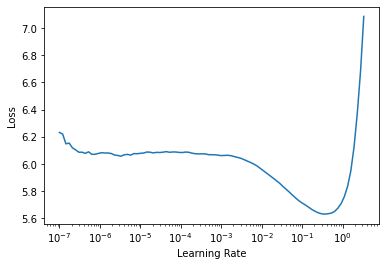

In [ ]:
learn.lr_find()

In [ ]:

learn.fit_one_cycle(3, 1e-2)


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.433806,4.233649,0.260683,68.968460,00:45
1,4.053947,4.079511,0.275032,59.116535,00:44
2,3.829497,4.057648,0.278280,57.838100,00:44


SuggestedLRs(lr_min=0.0001737800776027143, lr_steep=9.999999747378752e-06)

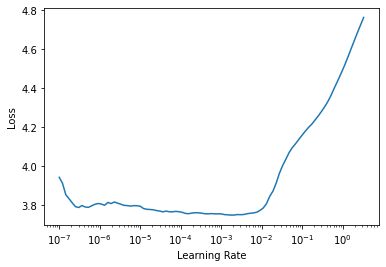

In [ ]:
learn.freeze_to(-2)
learn.lr_find()

In [ ]:
learn.fit_one_cycle(3, slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.848222,4.043449,0.279123,57.022671,00:45
1,3.656543,3.948255,0.293237,51.844810,00:44
2,3.304791,3.958628,0.296113,52.385414,00:44


In [ ]:
learn.save_encoder('fine_enc')

In [ ]:
TEXT = 'our lifestyle is'
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)]
print(preds)

["our lifestyle is lockdownuk except for the last nursing shift . The ' toilet paper ' is now out of stock … # coronavirus # food # COVIDIOT For those who need to stock or hoard , there s", "our lifestyle is strong and has been strong since the start of the COVID-19 crisis . \r\r\n\r\r\n It 's the beginning of the end for fracking - In a couple weeks prices have been mixed as the coronavirus outbreak"]


In [ ]:
train_df.head()

,OriginalTweet,Sentiment,cleaned_text
20468,Look at the massive amount of CEOs which are all pedophiles have stepped down,Neutral,Look at the massive amount of CEOs which are all pedophiles have stepped down
36278,"In Praise of Preppers: Thanks to a community that has literally been waiting for this day to come, thereÂs now an online shopping industry to help you prepare for the COVID-19 apocalypse. https://t.co/c9FsNMaC7n",Extremely Positive,"In Praise of Preppers: Thanks to a community that has literally been waiting for this day to come, theres now an online shopping industry to help you prepare for the COVID-19 apocalypse."
15665,best recipe for handmade sanitizer ... it really works! #Coronavirus .... https://t.co/bTaoQMBAn1,Extremely Positive,best recipe for handmade sanitizer ... it really works! #Coronavirus ....
38348,Last week the amp took unprecedented action to try and stop related scam from bombarding American consumers demanding that gateway providers cut off robocallers in 48 hours or risk losing all access to U S phone network,Extremely Negative,Last week the amp took unprecedented action to try and stop related scam from bombarding American consumers demanding that gateway providers cut off robocallers in 48 hours or risk losing all access to U S phone network
32507,The rise in consumer prices eased to 2.5 percent year-on-year in March due mainly to the price freeze put in place by the government under the nationwide state of calamity amid the COVID-19 pandemic and the decline in the global prices of oil. https://t.co/YKjhJhs9eE,Positive,The rise in consumer prices eased to 2.5 percent year-on-year in March due mainly to the price freeze put in place by the government under the nationwide state of calamity amid the COVID-19 pandemic and the decline in the global prices of oil.


In [ ]:
data_clas = TextDataLoaders.from_df(train_df, text_col= 2, label_col= 1, valid_pct=0.20, bs=64)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
test = TextDataLoaders.from_df(test_df, text_col= 2, label_col= 1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
data_clas.show_batch(max_n=5)

,text,category
0,"xxbos xxrep 5 ? ? ? xxrep 7 ? ? ? xxrep 7 ? xxrep 4 ? xxrep 4 ? xxrep 11 ? ? ? xxrep 6 ? xxrep 4 ? , xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? ? ? xxrep 4 ? ? ? xxrep 3 ? , xxrep 4 ? ? ? ? ? xxrep 6 ? xxrep 3 ? xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? \r\r\n▁ xxrep 5 ? xxrep 6 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 4 ? ? ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 8 ? ? ? xxrep 6 ? ? ? xxrep 5 ? ? ? xxrep 3 ? xxrep 4 ? ? ? xxrep 7 ? xxrep 5 ? - xxrep 8 ? xxrep 5",Neutral
1,xxbos ? ? xxrep 9 ? ? ? ? xxrep 6 ? xxrep 5 ? ? xxrep 6 ? ? ? xxrep 4 ? xxrep 4 ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 3 ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? . \r\r\n▁ xxrep 4 ? xxrep 10 ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? . ? ? ? ? xxrep 3 ? ? xxrep 4 ? xxrep 4 ? xxrep 4 ? xxrep 5 ? ? ? xxrep 3 ? ? ? xxrep 6 ? ? ? xxrep 3 ? xxrep 7 ? ? ? xxrep 3 ? xxrep 3 ? ? ? ? ? xxrep 5 ? xxrep 3 ? ? ? xxrep 4 ? xxrep 5 ? . \r\r\n▁ xxrep 3 ? xxrep 3 ? ? ? ? ? xxrep 5 ? ?,Neutral
2,"xxbos hiked prices in the face of the xxmaj covid-19 crises are listed below : \r\r\n xxmaj xxunk xxmaj bazar xxunk xxmaj xxunk xxmaj road , xxup e1 xxunk . \r\r\n xxmaj xxunk xxmaj bazaar 84 xxmaj xxunk xxmaj rd , xxup xxunk xxunk . \r\r\n xxmaj fish xxmaj bazar xxunk xxmaj xxunk street , xxup e1 xxunk . \r\r\n xxmaj xxunk xxmaj bazar xxunk - xxunk xxmaj xxunk xxmaj street , xxup e1 xxunk . \r\r\n xxmaj xxunk xxmaj brother limited xxunk - xxunk xxmaj mile xxmaj end xxmaj xxunk",Negative
3,xxbos 20 / 03 / 20 ? \r\r\n xxmaj looking to buy in : \r\r\n▁ # spy xxup xxunk sandp xxunk $ 210 \r\r\n▁ # xxunk xxmaj carnival xxmaj xxunk $ 9 \r\r\n▁ # xxunk xxmaj royal xxmaj xxunk $ 15 \r\r\n▁ # dal xxmaj delta xxmaj xxunk $ 16 \r\r\n▁ # xxunk xxmaj united xxmaj xxunk $ 20 \r\r\n xxmaj all would be a buy in my eyes at these prices # stocks # invest # coronavirus \r\r\n xxmaj any ideas or thoughts drop below ? ?,Positive
4,"xxbos xxmaj men , xxup step xxup the # xxup xxunk xxup up ! ! xxmaj during this # xxmaj coronavirus pandemic , xxmaj do xxup not allow your xxunk / childrens mom , to go to the supermarket with the kids ! ! xxup you xxup go ! ! xxmaj whether you live with her or not # xxup xxunk , xxup you # xxunk and xxup you take the risk for # xxup covid19 , not your kids . # xxunk ? ?",Negative


In [ ]:
train_df['Sentiment'].unique()

array(['Neutral', 'Extremely Positive', 'Extremely Negative', 'Positive', 'Negative'], dtype=object)

In [ ]:
classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3, metrics=accuracy)

In [ ]:
classifier.load_encoder('fine_enc')

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.0014454397605732083)

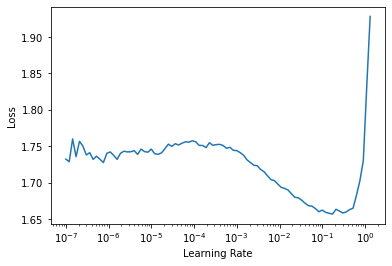

In [ ]:
classifier.lr_find()

In [ ]:
classifier.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.450719,1.384043,0.379101,00:18
1,1.418893,1.366930,0.394897,00:17
2,1.395639,1.337433,0.414164,00:17
3,1.355734,1.325618,0.422323,00:17
4,1.344073,1.314743,0.426836,00:17


In [ ]:
classifier.freeze_to(-4)
classifier.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.959051,0.922484,0.638431,00:22
1,0.741206,0.692775,0.742406,00:22
2,0.591301,0.604424,0.785627,00:22


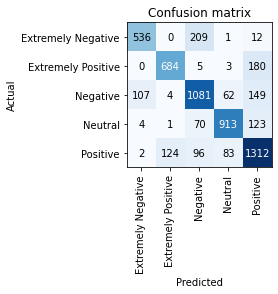

In [ ]:
from fastai.vision import *

interp = ClassificationInterpretation.from_learner(classifier)

interp.plot_confusion_matrix()

In [ ]:
classifier.predict('I hate corona virus')

('Extremely Negative',
 tensor(0),
 tensor([9.9935e-01, 9.4686e-09, 6.4548e-04, 5.4781e-08, 1.1805e-07]))

In [ ]:
classifier.predict('Our life style has been changed a lot due to the covid-19')

('Neutral', tensor(3), tensor([0.0082, 0.0067, 0.0128, 0.9482, 0.0240]))

In [ ]:
from sklearn.metrics import confusion_matrix
pre_arr = []
ans_arr = []


batch_data = test_df
size = len(batch_data)

for k in range(size):
  data  = batch_data.iloc[:,2].values
  row, clas, probs = classifier.predict(data[k])
  data2 = batch_data.iloc[:,1].values
  ans  = data2[k]
  pre_arr.append(row)
  ans_arr.append(ans)
res_data = list(zip(pre_arr, ans_arr))
res_df = pd.DataFrame(res_data) 


In [ ]:
y_pred =  res_df[0] 
y_actu =  res_df[1]


df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion.columns=['Extremely Negative','Extremely Positive', 'Negative', 'Neutral','Positive']
df_confusion = df_confusion.rename_axis(None)

In [ ]:
df_confusion

,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
Extremely Negative,1068,1,470,8,25
Extremely Positive,1,1544,12,10,422
Negative,206,10,2343,134,312
Neutral,3,5,121,1992,171
Positive,5,251,240,202,2792


In [33]:
df = df_confusion[['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']]


,Extremely Negative,Negative,Neutral,Positive,Extremely Positive
Extremely Negative,1068,470,8,25,1
Extremely Positive,1,12,10,422,1544
Negative,206,2343,134,312,10
Neutral,3,121,1992,171,5
Positive,5,240,202,2792,251


In [36]:
df = df.reindex(index = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
df

,Extremely Negative,Negative,Neutral,Positive,Extremely Positive
Extremely Negative,1068,470,8,25,1
Negative,206,2343,134,312,10
Neutral,3,121,1992,171,5
Positive,5,240,202,2792,251
Extremely Positive,1,12,10,422,1544
